In this note book we are going to cover computer vision using pytorch. here is what we are going to cover in this notbook

I'll create a markdown table from the topics you previously shared about computer vision libraries in PyTorch:

| Section | Description |
|---------|-------------|
| 1. Load Data | Start with images of clothing from FashionMNIST |
| 2. Prepare Data | Load images using PyTorch `DataLoader` for training loop |
| 3. Model 0: Building a Baseline Model | Create multi-class classification model with loss function, optimizer, and training loop |
| 4. Making Predictions and Evaluating Model 0 | Make and evaluate predictions from baseline model |
| 5. Setup Device Agnostic Code | Write device-agnostic code for future models |
| 6. Model 1: Adding Non-Linearity | Improve baseline model by adding non-linear layers |
| 7. Model 2: Convolutional Neural Network (CNN) | Introduce convolutional neural network architecture |
| 8. Comparing Our Models | Compare the three different models |
| 9. Evaluating Our Best Model | Make predictions on random images and evaluate |
| 10. Making a Confusion Matrix | Create a confusion matrix to evaluate classification model |
| 11. Saving and Loading the Best Performing Model | Save and verify loading of the best model |

Let's import relevant dependencies

In [96]:
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#import matplotlib for visualization
import matplotlib.pyplot as plt


### 1. Getting Dataset
Here, we are going to use the Fashion MNIST dataset,it contains 10 classes representing 10 different classes. Thus it becomes a multi-class classification problem

In [97]:
# setting up training data
train_data = datasets.FashionMNIST(
    root = "data",# where to download data?
    train = True, # get training data
    download = True, # download data if it doens't exist on the disk
    transform= ToTensor(), # from PIL to torch tensor
    target_transform= None # we can transform labels as well
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,# get test data
    transform= ToTensor(),
    download= True,
    )

Let's see our first sample of training data

In [98]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Let's see the image shape

In [99]:
image.shape

torch.Size([1, 28, 28])

[color_channel = 1,height = 28, width = 28]

In [100]:
len(train_data.data),len(test_data.targets),len(train_data.targets),len(test_data.data)

(60000, 10000, 60000, 10000)

Now what are the 10 classes we talked about?

In [101]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


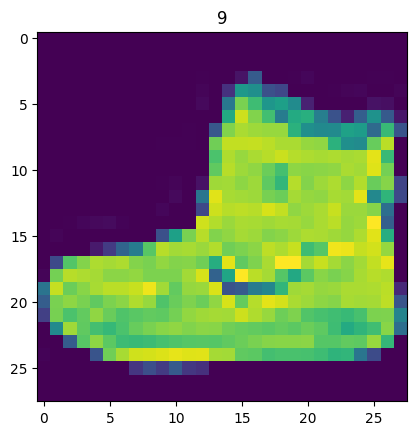

In [102]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

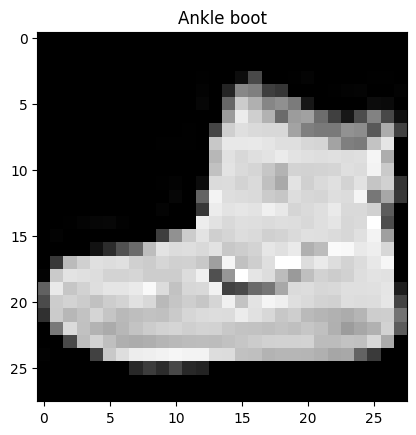

In [103]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

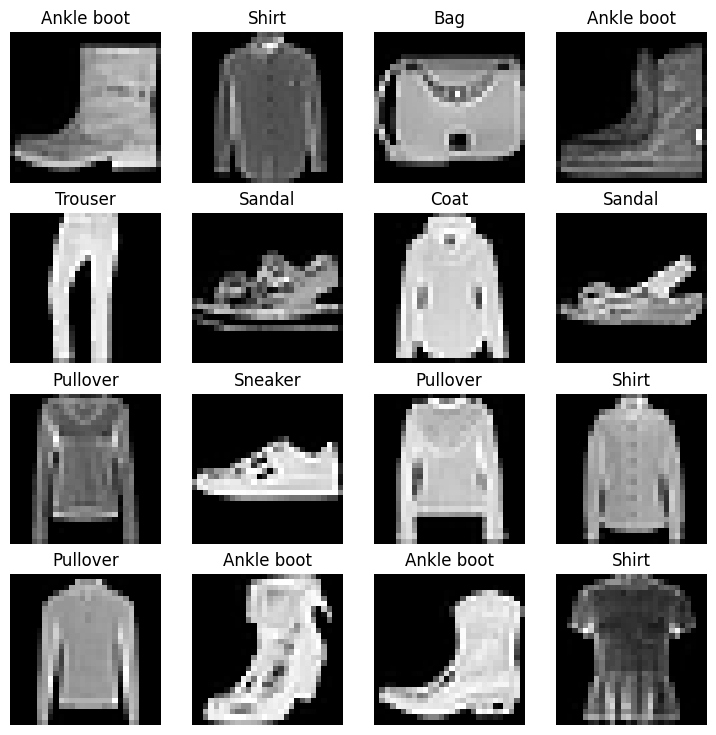

In [104]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Prepare DataLoader
The next step is to prepare it with a torch.utils.data.DataLoader or DataLoader for short

In [105]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# turn dataset into iterables(batches)
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle= False,
                            )
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloaders: {len(train_dataloader)} batches of 32")
print(f"Length of test dataloaders: {len(test_dataloader)} batches of 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001D1D0ABD730>, <torch.utils.data.dataloader.DataLoader object at 0x000001D1960B4620>)
Length of train dataloaders: 1875 batches of 32
Length of test dataloaders: 313 batches of 32


In [106]:
# check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### 3. Model 0 : Build a baseline model
Because we are working with image data, we're going to use a different layer to start things off. And that's the nn.Flatten() layer. This compresses the dimensions of tesnor into a single vector

In [107]:
flatten_model = nn.Flatten() #

# get a single sample
x = train_features_batch[0]

# flatten the sample
print(f"Shape of image before flatten: {x.shape}.")
output = flatten_model(x)
print(f"Shape after it was flatten: {output.shape}")

Shape of image before flatten: torch.Size([1, 28, 28]).
Shape after it was flatten: torch.Size([1, 784])


We have turned our pixel data into a long feature vector.

In [108]:
# model
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape : int , hidden_units : int, output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features = input_shape,out_features = hidden_units),
                                         nn.Linear(in_features= hidden_units,out_features=output_shape))
    def forward(self,x):
        return self.layer_stack(x)

now , before we instantiaz=te a model , we need to set the specific parameters accoriding to the need
  1. input_shape = 784, one for every pixel of image 28 x 28
  2. hidden_units = 10, could be whatever but for ease let's pick 10.
  3. output_shape = len(classes) , here it would be 10 as dataset contains 10 classes

In [109]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(784,10,len(class_names))
model_0.to("cpu") # keeping it on cpu to begin with

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

In [110]:
# lets import accurcay metric using helper function
from helper_functions import accuracy_fn

# setting up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

### 3.2 Creating a function to time our experiments
Let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.


In [111]:
from timeit import default_timer as Timer
def print_train_time(start : float , end : float, device : torch.device = None):
    """Prints the difference between start time and end time.
    Args :
        start(float) : Start time of computation
        end(float) : End time of computation
        device ([type] , optional) : Device that compute is running on
    
    Returns :
        float : time between start and end in seconds(higher is longer)
    
    """
    total_time = end - start
    print(f"Train time on {device} : {total_time : .3f} sec.")
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

Let's step through it :
 1. Loop through epochs
 2. Loop through training batches, perform training steps, calculate the train loss per batch
 3. Loop through testing batches, perform testing steps, calculate the test loss per batch
 4. Print out what's happening
 5. Time it all.
 


In [112]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = Timer()

# set the number of epochs ( we'll keep this small)
epochs = 3

for e in tqdm(range(epochs)):
    print(f"Epoch : {e}\n--------")
    # training 
    train_loss = 0
    # add a loop to loop through the batches
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulatively add up the loss per epoch

        optimizer.zero_grad()
        
        loss.backward()

        optimizer.step()

        # print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    ## Testing
    test_loss,test_acc = 0 , 0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_preds = model_0(X)
            test_loss += loss_fn(test_preds,y)

            test_acc += accuracy_fn(y,test_preds.argmax(dim=1))
        # calculations on test metrics should be inside of inference mode
        # divide the total test loss by length of test dataset(per batch)
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    # print what's happening
    print(f"\n Training loss : {train_loss: .5f} | Test loss : {test_loss : .5f},Test acc : {test_acc: .2f}% \n ")

train_time_end_on_cpu = Timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,device = str(next(model_0.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 33%|███▎      | 1/3 [00:09<00:18,  9.02s/it]


 Training loss :  0.59039 | Test loss :  0.50954,Test acc :  82.04% 
 
Epoch : 1
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 67%|██████▋   | 2/3 [00:21<00:11, 11.17s/it]


 Training loss :  0.47633 | Test loss :  0.47989,Test acc :  83.20% 
 
Epoch : 2
--------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


100%|██████████| 3/3 [00:32<00:00, 10.88s/it]


 Training loss :  0.45503 | Test loss :  0.47664,Test acc :  83.43% 
 
Train time on cpu :  32.634 sec.


In [113]:
len(train_dataloader),len(train_dataloader.dataset)

(1875, 60000)

### 4. Make predictions and get Model 0 results
Let's create a function to evaluate our model as we are going to build multiple  models

In [114]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model on dataloader
    Args:
        model(torch.nn.Module) : A pytorch model capable of making prediction on data
        data_loader(torch.utils.data.DataLoader) : The target dataset to predict on.
        loss_fn(torch.nn.Module) : The loss function of model
        accuracy_fn : An accuracy function model prediction to true labels
    
    Returns:
    (dict) : Result of model making predictions on data_loader
    
    """
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y,y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"Model Name": model.__class__.__name__,# only works when model is created by class
            "Model Loss" : loss.item(),
            "Model Accuracy" : acc}

# Calculate model 0 results on test dataset
model_0_results  = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_0_results

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': 83.42651757188499}

### 5. Setup device agnostic

In [115]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. Model 1 : Building a better model with non-linearity

In [116]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input_shape,out_features=hidden_units),
                                         nn.ReLU(),
                                         nn.Linear(in_features=hidden_units,out_features=output_shape),
                                         nn.ReLU())
    def forward(self,x : torch.Tensor):
        return self.layer_stack(x)
model_1 = FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss, optimizer and evaluation metrics

In [117]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

### 6.2 Functionizing training and test loops
- For training loop we'll create a function called train_step() which takes in a model, a DataLoader a loss function and an optimizer.
- For testing loop will be similar but it'll be called test_step() and it'll take in a model, a DataLoder,a loss function and an evaluation function

In [118]:
def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
    train_loss, train_acc = 0,0
    model.to(device)
    for batch,(X,y) in enumerate(data_loader):
        X,y = X.to(device),y.to(device)

        #1 . forward pass
        y_pred = model(X)
        
        #2. Calculate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        #3. Optimizer zero grad
        optimizer.zero_grad()

        #4. Backward loss
        loss.backward()

        #5. Optimizer step
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss : {train_loss : .5f} | Train accuracy : {train_acc : .5f}")

        

In [119]:
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):
    test_loss,test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device),y.to(device)
            # forward pass
            test_pred = model(X)
            # calculating loss
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [120]:
torch.manual_seed(42)
 # measure timeit import default_timer as timer
train_time_start_on_gpu = Timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device=device)
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = Timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss :  0.98248 | Train accuracy :  65.06000


 33%|███▎      | 1/3 [00:11<00:23, 11.79s/it]

Test loss: 0.76060 | Test accuracy: 72.80%

Epoch: 1
------
Train Loss :  0.70366 | Train accuracy :  74.48000


 67%|██████▋   | 2/3 [00:23<00:11, 11.91s/it]

Test loss: 0.71731 | Test accuracy: 73.67%

Epoch: 2
------
Train Loss :  0.67375 | Train accuracy :  75.30500


100%|██████████| 3/3 [00:35<00:00, 11.86s/it]

Test loss: 0.69170 | Test accuracy: 74.81%

Train time on cuda :  35.575 sec.


Let's evaluate our model using eval_model()

In [121]:
model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

This error is thete because in our eval_model function we have not passede the data into the required device

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"Model Name": model.__class__.__name__, # only works when model was created with a class
            "Model Loss": loss.item(),
            "Model Accuracy": acc}



In [ ]:
# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'Model Name': 'FashionMNISTModelV1',
 'Model Loss': 0.6917039155960083,
 'Model Accuracy': 74.810303514377}

In [ ]:
# check the baseline model and compare
model_0_results

{'Model Name': 'FashionMNISTModelV0',
 'Model Loss': 0.47663894295692444,
 'Model Accuracy': 83.42651757188499}

it looks like it has made it worse, From the look of things, it seems like our model is overfitting on the training data.

### 7. Model 2 : Buuiding a Convolutional Neural Network(CNN)
We are going to be using TinVGG from the CNN explainer website as the model to classify our FashionMNIST datasets.
We will leverage the nn.Conv2d() and nn.MaxPool12d() layers from torch.nn

In [ ]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels = hidden_units,
                      kernel_size=3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      padding = 1,
                       stride = 1 ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2))
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape))
    def forward(self,x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

In [ ]:
model_2 = FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through nn.Conv2d()
Before we start using our model, let's see what happens through convolutional layer and maxpooling layer

To, test the layers out, let's creat some toy data just like the data used on CNN explainer

In [ ]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))# [batch size, color channel,h,w]
test_image = images[0]
print(f"Image batch size: {images.shape}")
print(f"Single image size: {test_image.shape}")
print(f"Single image pixel values : \n{test_image}")

Image batch size: torch.Size([32, 3, 64, 64])
Single image size: torch.Size([3, 64, 64])
Single image pixel values : 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

In [ ]:
# now let's creat a simple Conv layer
conv_layer = nn.Conv2d(3,10,3,1,0)
conv_layer(test_image)

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [ ]:
conv_layer(test_image).shape,test_image.shape


(torch.Size([10, 62, 62]), torch.Size([3, 64, 64]))

image sizes after conv layer might be different with different values for different values of conv operation. Behind teh scenes our nn.Conv2d() is compressing the information stored in the image


In [ ]:
# check out the conv_layer-1 internal parameters
print(conv_layer.state_dict())

OrderedDict({'weight': tensor([[[[-0.0980, -0.0932, -0.0657],
          [ 0.0543,  0.0279, -0.0050],
          [-0.1058,  0.0739,  0.1665]],

         [[-0.1828, -0.0083,  0.0375],
          [-0.1812, -0.0576, -0.0810],
          [-0.1214, -0.1053,  0.0157]],

         [[ 0.0242,  0.1696,  0.0621],
          [-0.0382, -0.1491, -0.1747],
          [ 0.1375, -0.0280, -0.1159]]],


        [[[-0.0600, -0.1148,  0.1637],
          [-0.1369,  0.0516,  0.0649],
          [-0.0878,  0.1724,  0.0266]],

         [[ 0.0372, -0.1917,  0.0656],
          [-0.1913, -0.0182,  0.1658],
          [ 0.0254,  0.0197,  0.1340]],

         [[-0.1544, -0.0901, -0.1373],
          [-0.0800, -0.0452,  0.1142],
          [ 0.0041,  0.0443, -0.1047]]],


        [[[-0.1879, -0.0414, -0.1471],
          [ 0.0456,  0.0834,  0.1407],
          [-0.0360,  0.0112, -0.0756]],

         [[-0.0171, -0.0378,  0.0735],
          [ 0.1024,  0.0684, -0.0780],
          [ 0.1231,  0.0585, -0.1279]],

         [[ 0.1321,  

The shapes of these are manipulated by the inputs we passed to nn.Conv2d()

In [ ]:
print(f"conv_layer_2 weight shape: {conv_layer.weight.shape}")
print(f"conv_layer_2 bias shape: {conv_layer.bias.shape}")

conv_layer_2 weight shape: torch.Size([10, 3, 3, 3])
conv_layer_2 bias shape: torch.Size([10])


### 7.2 Stepping through nn.MaxPool2d()
Now,let's check out what happens when we move data through nn.MaxPool2d()

In [ ]:
print(f"Test image original shape:{test_image.shape}")
print(f"Test image with unsquezzed dimension: {test_image.unsqueeze(dim=0).shape}")

# create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer() : {test_image_through_conv_and_max_pool.shape}")

Test image original shape:torch.Size([3, 64, 64])
Test image with unsquezzed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer() : torch.Size([1, 10, 31, 31])


Our image went from 62x62 to 31x31, we can see the reduction in the image's spatial dimensions

Let's see this work with smaller tensors

In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.shape)

#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor to maxpoolin layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor : {max_pool_tensor.shape}")
print(max_pool_tensor)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
Max pool tensor : torch.Size([1, 1, 1, 1])
tensor([[[[0.3367]]]])


We have see out tensor went from [2,2] to [1,1]
and the only tensor value remaning from random tensor was the highest value there

### 7.3 Setup a loss function and optimizer for model_2


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(),lr=0.1)

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as Timer
train_time_start_on_model_2 = Timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model = model_2,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device= device)
    test_step(data_loader = test_dataloader,
              model = model_2,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_model_2 = Timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_model_2,
                                           end=train_time_end_on_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
Train Loss :  0.74571 | Train accuracy :  72.73167


 33%|███▎      | 1/3 [00:16<00:33, 16.73s/it]

Test loss: 0.38722 | Test accuracy: 86.09%

Epoch : 1
---------
Train Loss :  0.36451 | Train accuracy :  86.79000


 67%|██████▋   | 2/3 [00:31<00:15, 15.36s/it]

Test loss: 0.35052 | Test accuracy: 86.71%

Epoch : 2
---------
Train Loss :  0.32556 | Train accuracy :  88.25333


100%|██████████| 3/3 [00:45<00:00, 15.31s/it]

Test loss: 0.32643 | Test accuracy: 87.99%

Train time on cuda :  45.937 sec.


In [ ]:
model_2_results = eval_model(model = model_2,data_loader = test_dataloader,loss_fn=loss_fn,accuracy_fn = accuracy_fn)
model_2_results

{'Model Name': 'FashionMNISTModelV2',
 'Model Loss': 0.3264252841472626,
 'Model Accuracy': 87.98921725239616}

### 8. Compare model results and training time
1. model_0 = our base line model with two nn.Linear() layers
2. model_1 = the same setup as our baseline model except with nn.ReLU() activation function
3. model_2 = our first CNN model that mimics the TinyVGG achitecture

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,Model Name,Model Loss,Model Accuracy
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.691704,74.810304
2,FashionMNISTModelV2,0.326425,87.989217


In [122]:
compare_results['Training time'] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]

In [123]:
compare_results

,Model Name,Model Loss,Model Accuracy,Training time
0,FashionMNISTModelV0,0.476639,83.426518,32.634083
1,FashionMNISTModelV1,0.691704,74.810304,35.574560
2,FashionMNISTModelV2,0.326425,87.989217,45.937428


### Performance-speed tradeoff
Even through the performance of a model is very good, it might not be ideal as we need to account for the time it took to train.

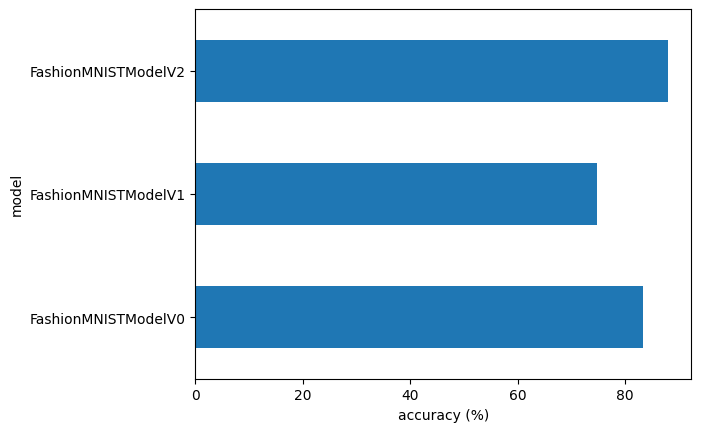

In [125]:
# Visualize our model results
compare_results.set_index("Model Name")["Model Accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

### 9. Make and evaluate random predictions with best model
Let's further evaluate our best performing model, model_2 , to do so let's create a function make_predictions() where we can pass the model and some data for it predict on

In [165]:
def make_predictions(model : torch.nn.Module,data : list, device : torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare sample
            
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # forward pass(model outputs raw logits)
            pred_logit = model(sample)
        
            #Get the prediciton probabilty(probabilty distribution)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim =0)

            #get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [166]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
# view the first test sample shape and label
print(f"Test sample image shape : {test_samples[0].shape}\n Test sample label : {test_labels[0]}({class_names[test_labels[0]]})")

Test sample image shape : torch.Size([1, 28, 28])
 Test sample label : 5(Sandal)


In [167]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2,data=test_samples)
pred_probs[:2]

tensor([[4.1441e-07, 6.7616e-09, 7.8611e-08, 3.3762e-08, 6.7911e-09, 9.9992e-01,
         6.2699e-06, 1.2282e-06, 3.1321e-05, 3.8109e-05],
        [4.4176e-02, 7.1993e-01, 4.6032e-03, 1.8942e-01, 1.6395e-02, 5.3036e-03,
         1.6440e-02, 1.5343e-03, 8.8226e-04, 1.3157e-03]])

In [171]:
# turn the prdictions probabilties into prediction labels by taking argmax
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [172]:
test_labels,pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Seems accurate when comparing test_labels and pred_classes.Let's visualize it

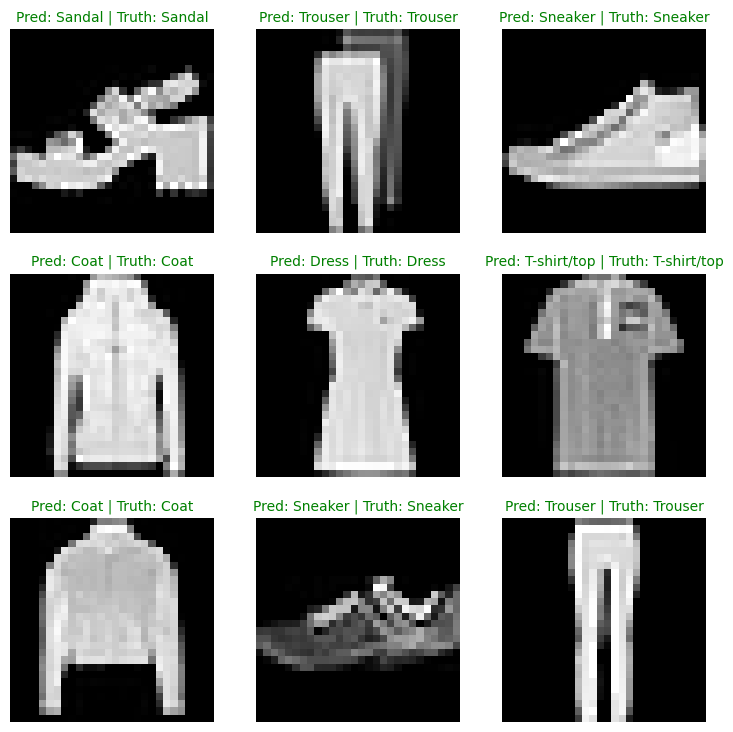

In [179]:
# plot predicitions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i ,sample in enumerate(test_samples):
    #create a subplot
    plt.subplot(nrows, ncols, i+1)
    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    #find the prediction labels(in Text form)
    pred_label = class_names[pred_classes[i]]

    # true label
    truth_label = class_names[test_labels[i]]

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)


### 10. Making confusion matrix for further prediction evaluation
Now we've got predictions, let's go through steps 2 & 3: 2. Make a confusion matrix using torchmetrics.ConfusionMatrix. 3. Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

First we'll need to make sure we've got torchmetrics and mlxtend installed (these two libraries will help us make and visualize a confusion matrix).

In [184]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in test_dataloader:
        X,y = X.to(device),y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)# # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)

        y_preds.append(y_pred.cpu())

# concatentate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


In [185]:
import torchmetrics,mlxtend

torchmetrics and mlxtend installed, let's make a confusion matrix!

First we'll create a torchmetrics.ConfusionMatrix instance telling it how many classes we're dealing with by setting num_classes=len(class_names).

Then we'll create a confusion matrix (in tensor format) by passing our instance our model's predictions (preds=y_pred_tensor) and targets (target=test_data.targets).

Finally we can plot our confusion matrix using the plot_confusion_matrix() function from mlxtend.plotting

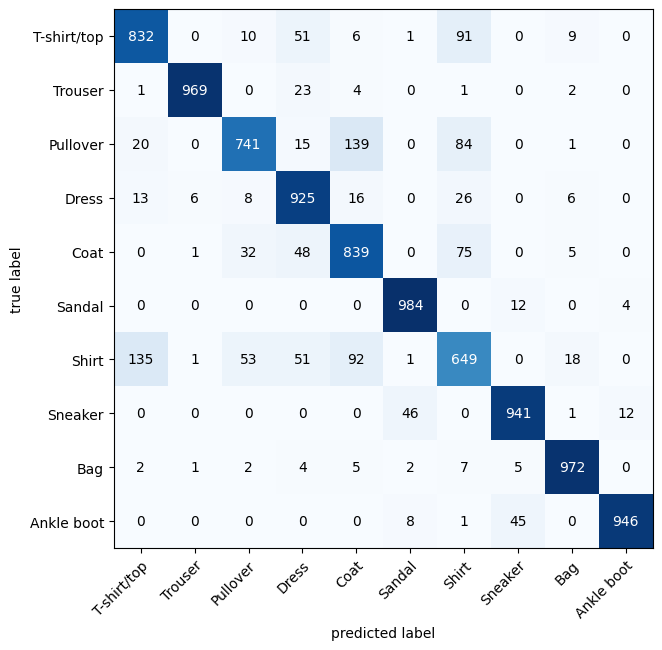

In [188]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#setup confusion matrix instance and compaer predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task ='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,target = test_data.targets)

# plot the confusion matrix
fig , ax = plot_confusion_matrix(conf_mat= confmat_tensor.numpy(),
                                 class_names=class_names,
                                 figsize=(10,7));

We can see where our model mostly got confused with it's predictions through the help of confusion matrix